In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from cudaviz.mandelbrot import naive_mandelbrot, julia
from cudaviz.diffusion import naive_diffusion
from cudaviz.ripple import ripple
import numpy as np

In [2]:
colors = ['#76b900', '#000000']
cmap = LinearSegmentedColormap.from_list("nvidia_green_to_black", colors)

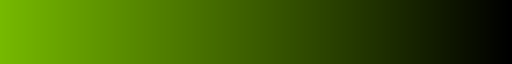

In [3]:
cmap

In [4]:
args = {
    'N': 2048,
    'max_iter': 200,
    'x_center': -0.7,
    'y_center': 0.0,
    'zoom': 0.1
}

In [5]:
%%timeit

julia(**args)

29.4 ms ± 1.39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit

naive_mandelbrot(**args)

85.5 ms ± 161 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


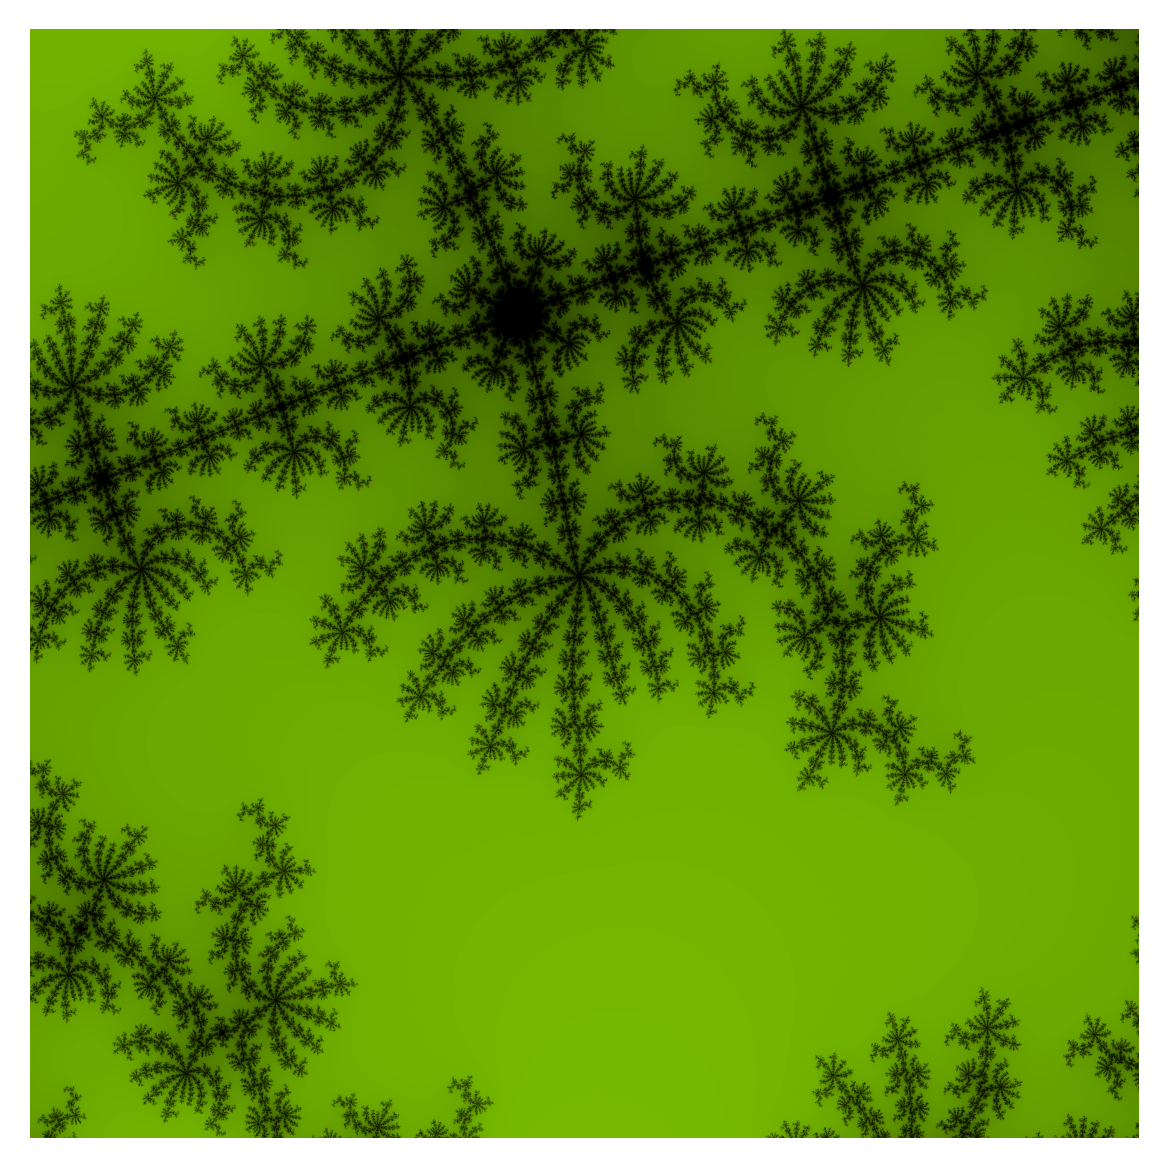

In [7]:
fig, ax = plt.subplots(dpi=300)

args = {
    'N': 2048,
    'max_iter': 200,
    'x_center': -0.7,
    'y_center': 0.35,
    'zoom': 0.001
}

naive_grid = naive_mandelbrot(**args)

ax.imshow(naive_grid, cmap=cmap)
ax.spines[:].set_visible(False)
ax.tick_params(width=0)
ax.set_xticks([])
ax.set_yticks([]);

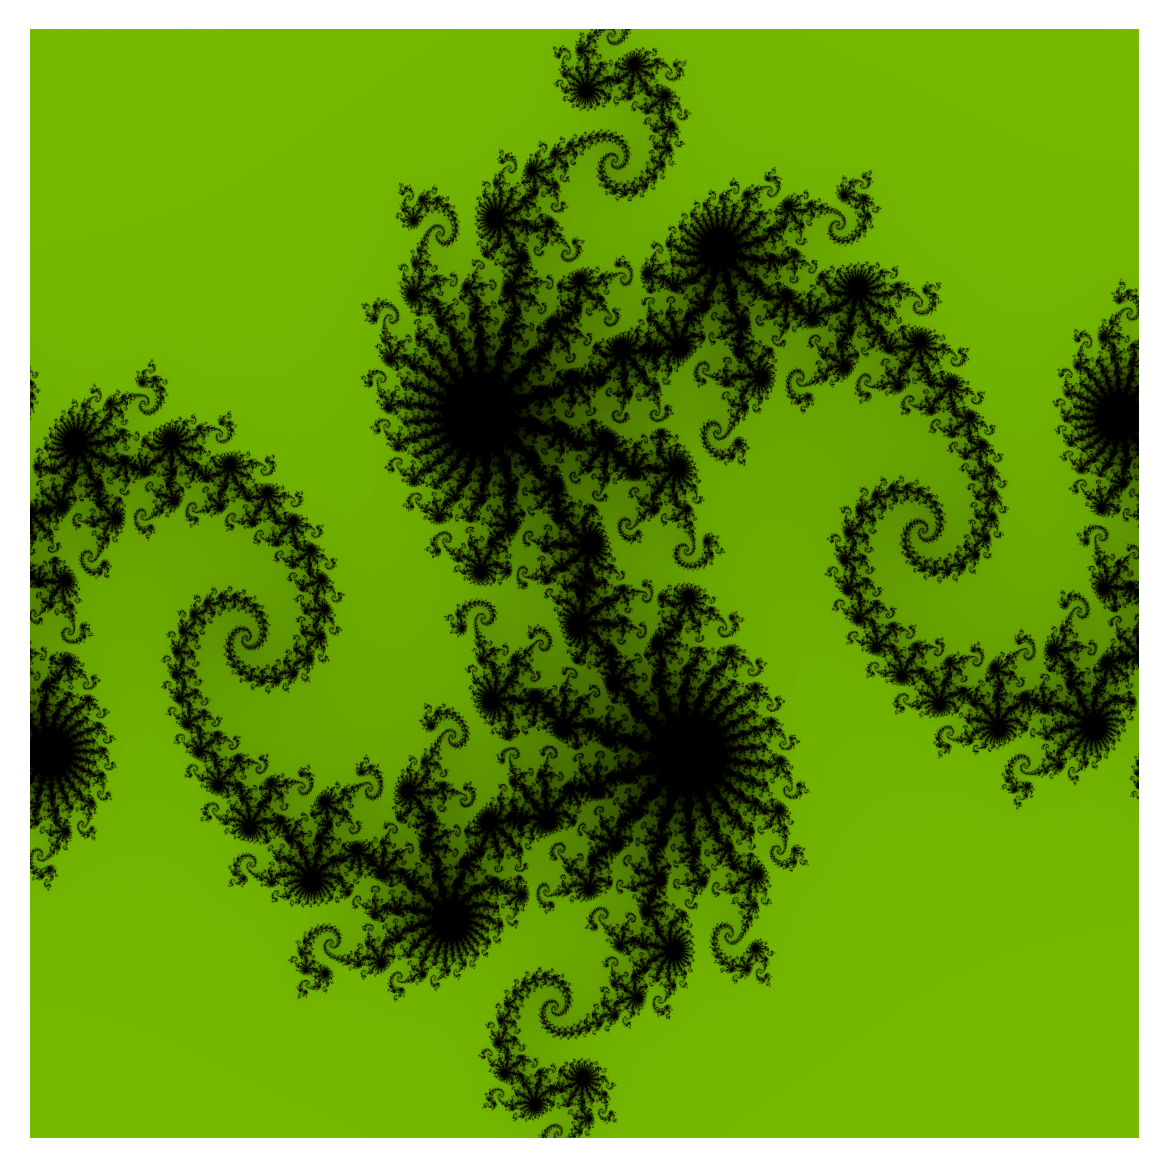

In [8]:
fig, ax = plt.subplots(dpi=300)

args = {
    'N': 2048,
    'max_iter': 200,
    'x_center': -0.7,
    'y_center': 0.0,
    'zoom': 0.001
}

grid = julia(**args)

ax.imshow(grid, cmap=cmap)
ax.spines[:].set_visible(False)
ax.tick_params(width=0)
ax.set_xticks([])
ax.set_yticks([]);

In [9]:
# for stability
# dt * alpha / (dy * dx) <= 1 / 4

In [10]:
kwargs = {
    "nx": 256,
    "ny": 256,
    "nt": 50,
    "central_temperature": 5,
    "spread": 2**10,
    "alpha": 3,
    "dt": 0.1
}
data = np.array(naive_diffusion(**kwargs))

In [11]:
%matplotlib inline
from matplotlib import rc
rc('animation', html='jshtml')

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
im = ax.imshow(data[0], cmap='coolwarm', vmin=data.min(), vmax=data.max())
cbar = fig.colorbar(im, ax=ax)
ax.set_xticks([])
ax.set_yticks([])
ax.spines[:].set_visible(False)

def update(frame):
    im.set_data(data[frame])
    return [im]

ani = FuncAnimation(fig, update, frames=len(data), blit=True, interval=100);

In [13]:
ani

In [14]:
rip = ripple(N=1024, tick=0)

In [15]:
fig, ax = plt.subplots()
im = ax.imshow(rip, cmap='binary')
ax.set_xticks([])
ax.set_yticks([])
ax.spines[:].set_visible(False)